# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

## plot the data

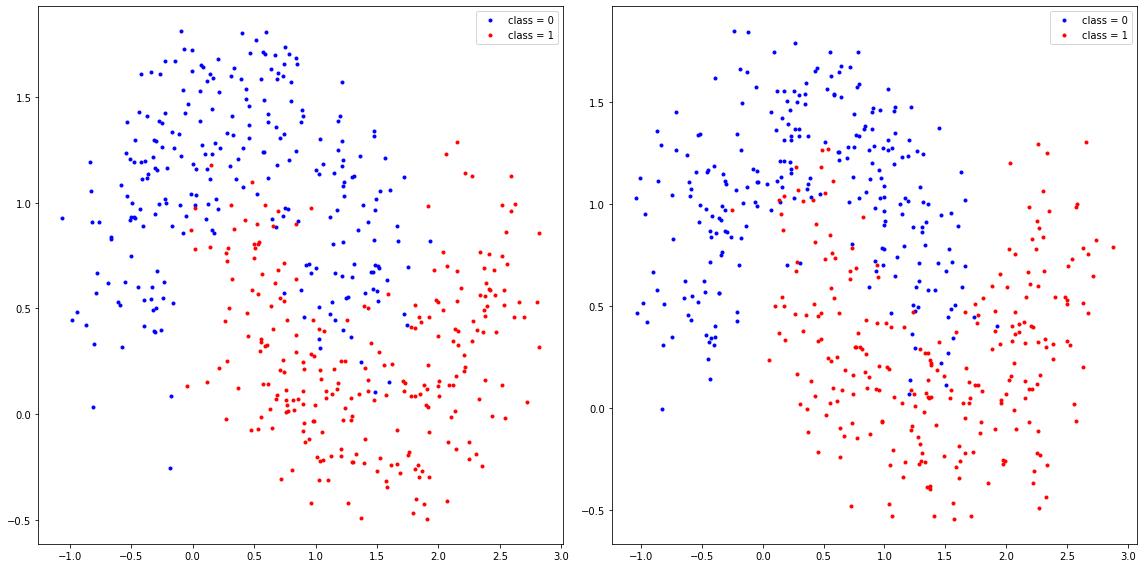

In [85]:
def plot_data(data_train, data_test):
    fig, ax = plt.subplots(1, 2, figsize = (16, 8))
    ax[0].plot(data_train[data_train[:, 2]==0, :][:, 0],
               data_train[data_train[:, 2]==0, :][:, 1],
               '.', color = 'blue', label = 'class = 0')
    ax[0].plot(data_train[data_train[:, 2]==1, :][:, 0],
               data_train[data_train[:, 2]==1, :][:, 1],
               '.', color = 'red', label = 'class = 1')
    ax[1].plot(data_test[data_test[:, 2]==0, :][:, 0],
               data_test[data_test[:, 2]==0, :][:, 1],
               '.', color = 'blue', label = 'class = 0')
    ax[1].plot(data_test[data_test[:, 2]==1, :][:, 0],
               data_test[data_test[:, 2]==1, :][:, 1],
               '.', color = 'red', label = 'class = 1')
    ax[0].legend(loc = 'upper right')
    ax[1].legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()
    
plot_data(data_train, data_test)

## define feature function

In [234]:
def feature_function(x, y):
    feature = np.zeros((len(x), 5))
    feature[:, 0] = x + y
    feature[:, 1] = x
    feature[:, 2] = y
    feature[:, 3] = (x + y)**2
    feature[:, 4] = np.tanh(x * y)
    
    return feature

## define regression function based on the feature function

In [18]:
def regression_function(theta, feature):
    value = feature @ theta
    
    return value

## define regularization function on the model parameters

In [33]:
def regularization_function(theta):
    value = np.diag(theta.T.dot(theta))
    
    return value

## define sigmoid function

In [19]:
def logistic_function(x):
    z = 1 / (1 + np.exp(-x))
    
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [25]:
def compute_loss_feature(theta, feature, label, alpha):
    reg_l2 = (alpha / 2) * regularization_function(theta)
    loss = (1/len(label))*(((-label).T@np.log(feature + np.finfo(float).eps))
                          - ((1-label).T@np.log(1-feature+np.finfo(float).eps)))
    loss += reg_l2
    
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [74]:
def compute_gradient_feature(theta, feature, label, alpha):
    gradient = (1/len(label)) *(feature.T@(logistic_function(feature@theta)-label))
    reg = alpha * theta
    gradient += reg
    
    return gradient

## compute the accuracy

In [258]:
def compute_accuracy(theta, feature, label):
    value = regression_function(theta, feature)
    sig_value = logistic_function(value)
    sig_value[sig_value >= 0.5] = 1
    sig_value[sig_value < 0.5] = 0
    
    cnt = 0
    for i in range(len(label)):
        if sig_value[i] == label[i]:
            cnt += 1
    accuracy = cnt / len(label)
    print(accuracy)
    print(label.shape)
    print(cnt)
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [235]:
num_iteration   = 30000
learning_rate   = 0.1
alpha           = 0.01

theta = np.array((1, 1, 1, 1, 1, 1))
theta = theta[:, np.newaxis]
one = np.ones((len(data_train), 1))

dim_feature = theta.size

# feature for train
feature_tr = feature_function(data_train[:, 0], data_train[:, 1])
feature_tr = np.hstack((one, feature_tr))

# feature for test
feature_te = feature_function(data_test[:, 0], data_test[:, 1])
feature_te = np.hstack((one, feature_te))

# label for train
label_tr = data_train[:, 2]
label_tr = label_tr[:, np.newaxis]

# label for test
label_te = data_test[:, 2]
label_te = label_te[:, np.newaxis]

In [236]:
theta_iteration             = np.zeros((num_iteration, dim_feature))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [237]:
for i in range(num_iteration):
    # train
    value_tr = regression_function(theta, feature_tr)
    h_hat_tr = logistic_function(value_tr)
    loss_tr = compute_loss_feature(theta, h_hat_tr, label_tr, alpha)

    # train
    value_te = regression_function(theta, feature_te)
    h_hat_te = logistic_function(value_te)
    loss_te = compute_loss_feature(theta, h_hat_te, label_te, alpha)

    # train iterations
    loss_iteration_train[i] = loss_tr
    acc_tr = compute_accuracy(theta, feature_tr, label_tr)
    accuracy_iteration_train[i] = acc_tr
    
    # test iterations
    loss_iteration_test[i] = loss_te
    acc_te = compute_accuracy(theta, feature_te, label_te)
    accuracy_iteration_test[i] = acc_te
    
    # update theta
    theta_iteration[i] = np.squeeze(theta)    
    theta = theta - learning_rate * compute_gradient_feature(theta, feature_tr, label_tr, alpha)

    if i % 2000 == 0:
        print(f"loss(train) : {np.round(loss_tr, 5)}, loss(test) : {np.round(loss_te, 5)}, acc(train) : {np.round(acc_tr, 5)}, acc(test) : {np.round(acc_te, 5)}")
theta_optimal = theta

loss(train) : [[3.55029]], loss(test) : [[3.47632]], acc(train) : 0.508, acc(test) : 0.508
loss(train) : [[0.36234]], loss(test) : [[0.38075]], acc(train) : 0.85, acc(test) : 0.848
loss(train) : [[0.36229]], loss(test) : [[0.38069]], acc(train) : 0.85, acc(test) : 0.848
loss(train) : [[0.36229]], loss(test) : [[0.38069]], acc(train) : 0.85, acc(test) : 0.848
loss(train) : [[0.36229]], loss(test) : [[0.38069]], acc(train) : 0.85, acc(test) : 0.848
loss(train) : [[0.36229]], loss(test) : [[0.38069]], acc(train) : 0.85, acc(test) : 0.848
loss(train) : [[0.36229]], loss(test) : [[0.38069]], acc(train) : 0.85, acc(test) : 0.848
loss(train) : [[0.36229]], loss(test) : [[0.38069]], acc(train) : 0.85, acc(test) : 0.848
loss(train) : [[0.36229]], loss(test) : [[0.38069]], acc(train) : 0.85, acc(test) : 0.848
loss(train) : [[0.36229]], loss(test) : [[0.38069]], acc(train) : 0.85, acc(test) : 0.848
loss(train) : [[0.36229]], loss(test) : [[0.38069]], acc(train) : 0.85, acc(test) : 0.848
loss(trai

## compute accuracy of the classifiers

In [259]:
accuracy_train  = compute_accuracy(theta_optimal, feature_tr, label_tr)
accuracy_test   = compute_accuracy(theta_optimal, feature_te, label_te)

0.85
(500, 1)
425
0.848
(500, 1)
424


In [260]:
425 / 500

0.85

## plot the results

In [80]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.plot(list(range(len(loss_iteration_train))),
             loss_iteration_train, '-',
             color = 'red',
             label = 'train')
    plt.plot(list(range(len(loss_iteration_test))),
             loss_iteration_test, '-',
             color = 'blue',
             label = 'test') 
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()

In [83]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.plot(list(range(len(accuracy_iteration_train))),
             accuracy_iteration_train, '-',
             color = 'red',
             label = 'train')
    plt.plot(list(range(len(accuracy_iteration_test))),
             accuracy_iteration_test, '-',
             color = 'blue',
             label = 'test') 
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()

In [86]:
def plot_data(data_train, data_test):
    fig, ax = plt.subplots(1, 2, figsize = (16, 8))
    ax[0].plot(data_train[data_train[:, 2]==0, :][:, 0],
               data_train[data_train[:, 2]==0, :][:, 1],
               '.', color = 'blue', label = 'class = 0')
    ax[0].plot(data_train[data_train[:, 2]==1, :][:, 0],
               data_train[data_train[:, 2]==1, :][:, 1],
               '.', color = 'red', label = 'class = 1')
    ax[1].plot(data_test[data_test[:, 2]==0, :][:, 0],
               data_test[data_test[:, 2]==0, :][:, 1],
               '.', color = 'blue', label = 'class = 0')
    ax[1].plot(data_test[data_test[:, 2]==1, :][:, 0],
               data_test[data_test[:, 2]==1, :][:, 1],
               '.', color = 'red', label = 'class = 1')
    ax[0].legend(loc = 'upper right')
    ax[1].legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()

In [245]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.plot(list(range(num_iteration)), theta_iteration[:, 0], '-', color = 'red',
             label = r'$\Theta_0$')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 1], '-', color = 'green',
             label = r'$\Theta_1$')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 2], '-', color = 'blue',
             label = r'$\Theta_2$')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 3], '-', color = 'black',
             label = r'$\Theta_3$')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 4], '-', color = 'purple',
             label = r'$\Theta_4$')
    plt.xlabel('iteration')
    plt.legend(loc = 'center right')
    plt.tight_layout()
    plt.show()

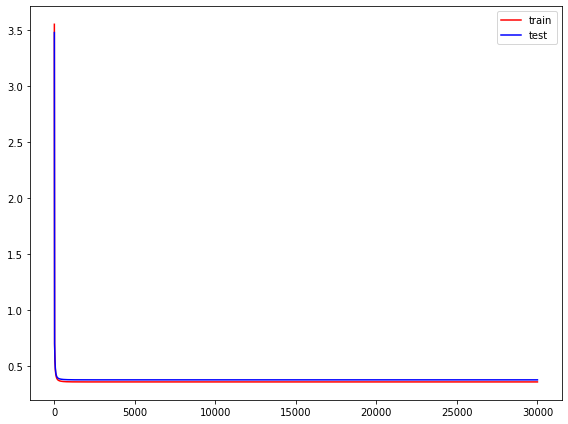

In [241]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

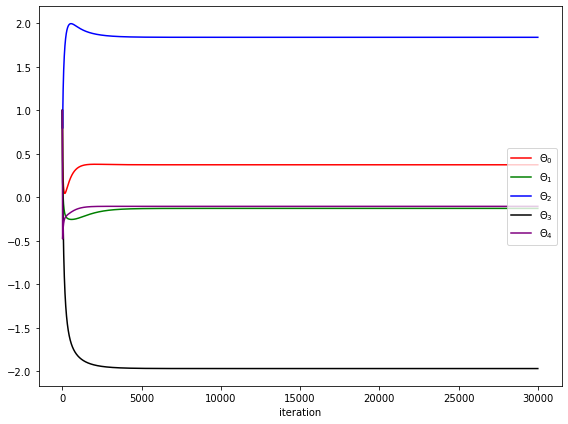

In [246]:
plot_model_parameter(theta_iteration)

In [221]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    # plot original data
    plt.plot(data[data[:, 2]==0, :][:, 0], data[data[:, 2]==0, :][:, 1],
             '.', color = 'blue', label = 'class = 0')
    plt.plot(data[data[:, 2]==1, :][:, 0], data[data[:, 2]==1, :][:, 1],
             '.', color = 'red', label = 'class = 1')
    # grid
    x = np.arange(-1, 3, 0.1)
    y = np.arange(-1, 2.5, 0.1)
    
    grid_x, grid_y = np.meshgrid(x, y)
    
    feature = feature_function(grid_x.flatten(), grid_y.flatten())
    
    one = np.ones((len(feature), 1))
    feature = np.hstack((one, feature))
    
    value = regression_function(theta, feature)
    sig_value = logistic_function(value)
    grid_z = sig_value.reshape(grid_x.shape)
    
    c = plt.contourf(grid_x, grid_y, grid_z, levels = np.linspace(0, 1, 100),
                     cmap = 'RdBu_r', vmin = 0, vmax = 1)
    
    plt.contour(grid_x, grid_y, grid_z, levels = [.5],
                cmap = 'Dark2', vmin = 0, vmax = 1)
    
    plt.colorbar(c)
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

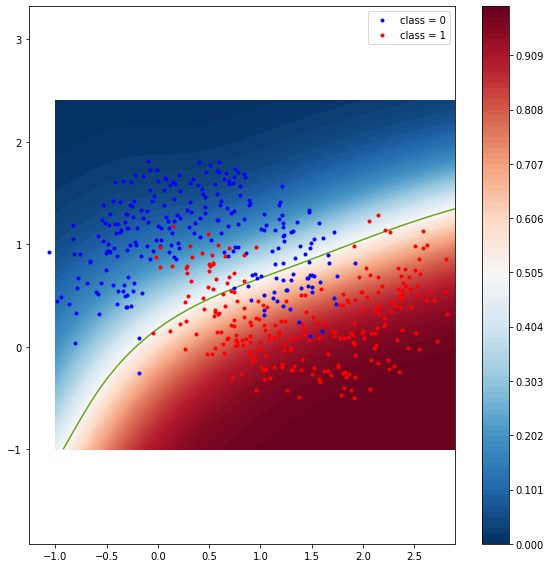

In [238]:
plot_classifier(data_train, theta_optimal)

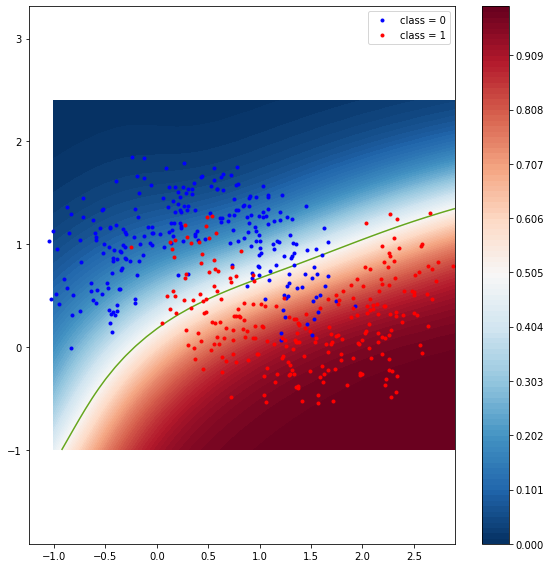

In [239]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

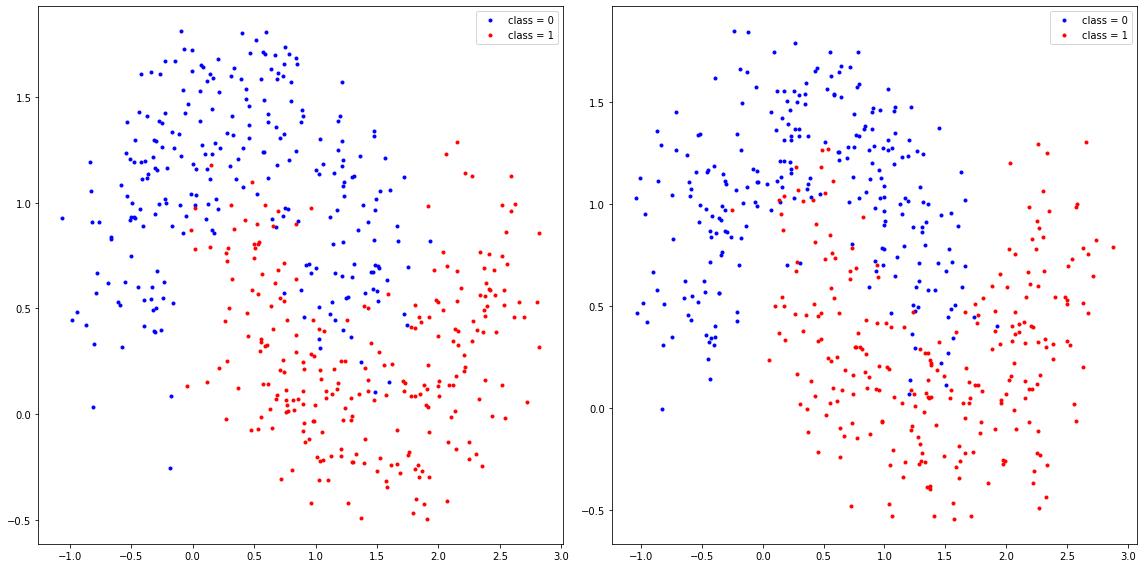

In [243]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

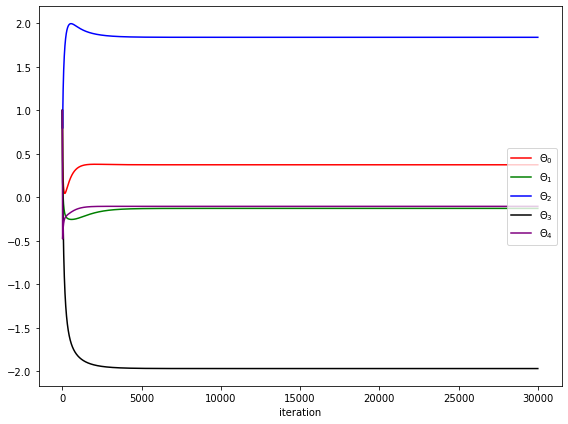

In [247]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

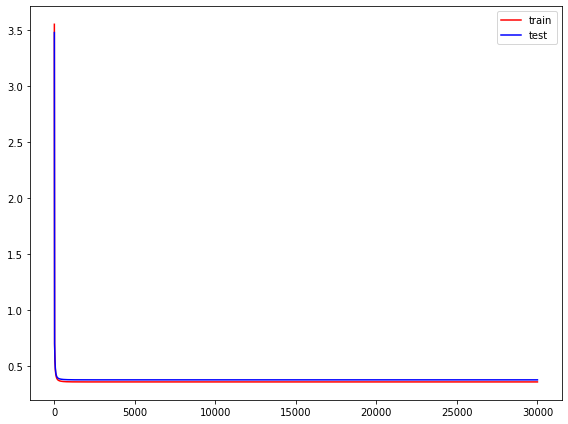

In [248]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

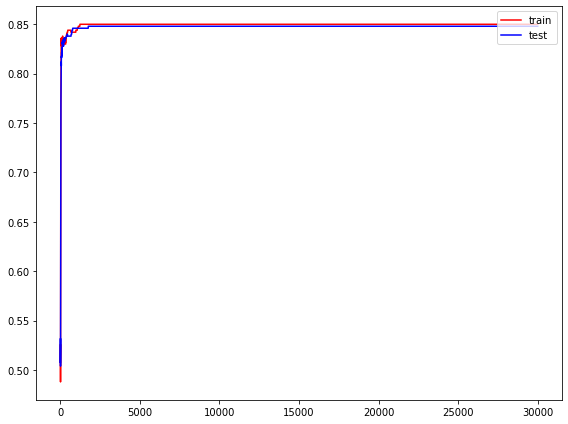

In [249]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

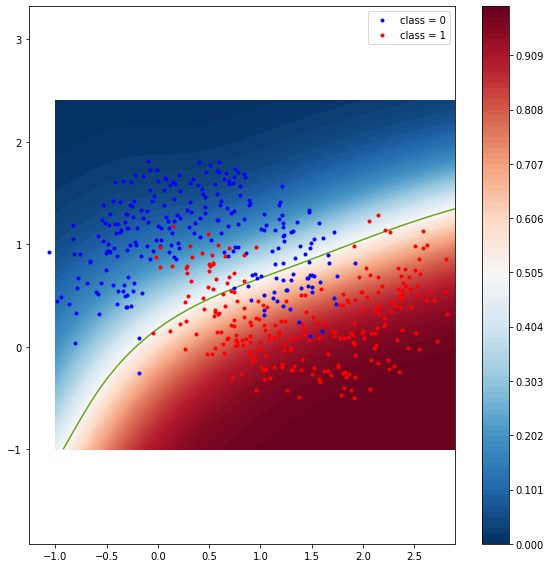

In [250]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

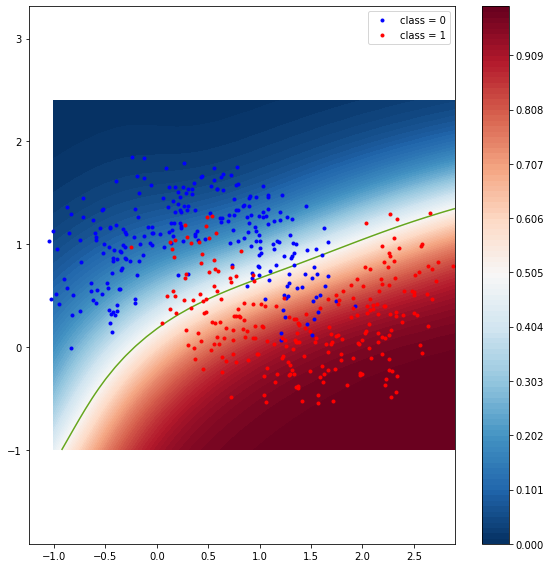

In [251]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [263]:
print('accuract(train): {:.5f}'.format(accuracy_train))
print('accuracy(test) : {:.5f}'.format(accuracy_test))

accuract(train): 0.85000
accuracy(test) : 0.84800
